In [24]:
# Standard PySceneDetect imports:
from scenedetect import VideoManager
from scenedetect import SceneManager
from scenedetect.detectors import ContentDetector
import subprocess
from datetime import timedelta
import os
import glob
import matplotlib.pyplot as plt
import librosa
import librosa.display
from tkinter import Tk
from tkinter import filedialog

In [3]:
Tk().withdraw() 
input_filenames = filedialog.askopenfilenames()
print (input_filenames)

('C:/Users/Szymon/Downloads/darkred.mp3',)


In [4]:
Tk().withdraw() 
output_filenames = filedialog.askdirectory()
print (output_filenames)

C:/Users/Szymon/Desktop/spleeter_output


In [5]:
subprocess.run(f'python -m spleeter separate -i {input_filenames[0]} -o {output_filenames} -p spleeter:4stems')

CompletedProcess(args='python -m spleeter separate -i C:/Users/Szymon/Downloads/darkred.mp3 -o C:/Users/Szymon/Desktop/spleeter_output -p spleeter:4stems', returncode=0)

In [9]:
   for x in glob.glob(f'{output_filenames}/**/drums.wav', recursive=True):
        drums_path = x

In [13]:
x, sr = librosa.load(f'{x}')

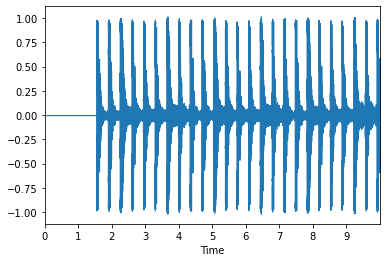

In [28]:
librosa.display.waveplot(x[0:sr*10],sr)

In [30]:
onset_frames = librosa.onset.onset_detect(x, sr=sr, wait=1, pre_avg=1, post_avg=1, pre_max=1, post_max=1)


In [31]:
clicks = librosa.clicks(frames=onset_frames, sr=sr, length=len(x))


In [ ]:
ipd.Audio(x + clicks, rate=sr)

In [32]:
S = librosa.stft(x)
logS = librosa.amplitude_to_db(abs(S))

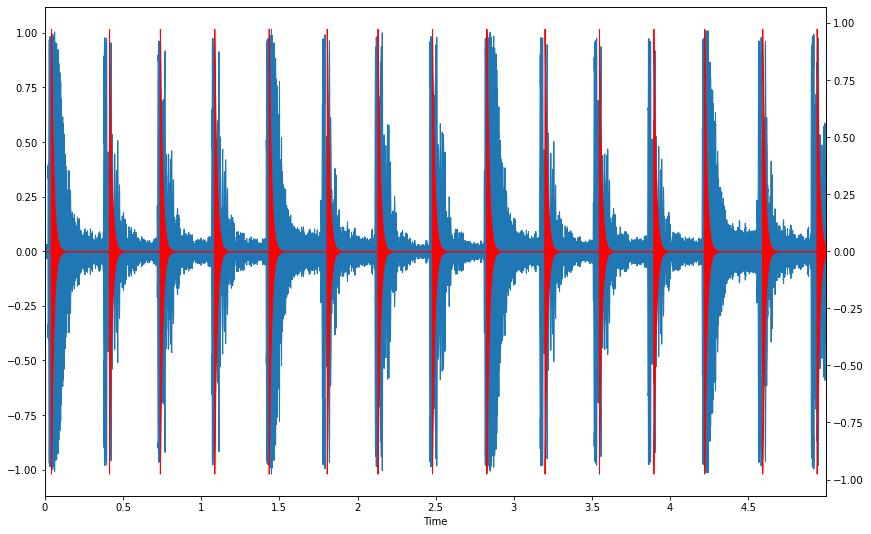

In [46]:
fig = plt.figure(figsize=(14, 9)) #This setups the figure
ax1 = fig.subplots() #Creates the Axes object to display one of the plots
ax2 = ax1.twinx() #Creates a second Axes object that shares the x-axis
start = 5 * sr
finish = 10 * sr
librosa.display.waveplot(x[start:finish], sr=sr, ax=ax1)
librosa.display.waveplot(clicks[start:finish],sr=sr, ax=ax2, color='r')
plt.show()

In [ ]:
clicks